<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/M3U5_fase_4_Preparacion_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1wuCtg5UbqCfKDczKQmweW9bgUDSY2t9a" alt = "Encabezado MLDS" width = "100%">  </img>

#**Integrantes:**
---
  - Yojhan Leandro Roldan Robles: yroldan@unal.edu.co

  -Daniela Mejia Castro: dmejiac@udistrital.edu.co

  -Robert Gomez: rgomezp@unal.edu.co

# **Preparación de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

In [ ]:
# Librerias para cargar y manipular los datos
import requests as re
import pandas as pd
#Librerias nlp

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [ ]:
#Descarga de los datos
url= "https://datasets-server.huggingface.co/rows?dataset=dair-ai%2Femotion&config=split&split=train&offset=0&length=100"
def get_data(url):
  get= re.get(url)
  dict_df=dict(get.json())
  data=[row["row"] for row in dict_df["rows"]]
  df = pd.DataFrame(data)
  return df



# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Importar los datos y almacenarlos en Dataframe df
df=get_data(url)

## **1. Análisis de calidad de los datos**
---

Describa la estructura y la naturaleza de los datos antes de comenzar con el análisis en profundidad.

### **1.1. Resumen de la calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de documentos vacíos o la existencia de datos de baja calidad en el conjunto?

  **No, en general se encuentra que el dataset contiene y brinda información relevante con respecto al objeto del analisis. Se evidencia que todos y cada uno de los elementos del conjunto de datos contiene texto y su respectiva clasificación.**
- ¿Se identifican documentos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?

  **Si, teniendo el cuenta que el objetivo del analisis es poder identificar y clasificar el sentimiento de cada tweet es importante extraer aquellas palabras o tokens que puedan brindar información relevante para su clasificación, por lo que tokens que representen signos de puntuación o que no aporten a la semantica de la oración (stop words como articulos o conectores) seran excluidos.**
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?

  **Partiendo del hecho de que estamos procesando datos no estructurados como los son los tweets, nos enfrentamos a un formato que por naturaleza tiene cierto grado de complejidad. Sin embargo, el formato de texto para los tweets y numero para las etiquetas no presentan variaciones ni inconsistencias no contempladas previamente.**
- ¿Se identificaron y abordan posibles problemas, como valores atípicos, duplicados o datos faltantes?

  **No se evidencia presencia de valores faltantes o duplicados. Por otro lado, los token atipicos como los signos de puntuación y stop words seran removidos para evitar su interferencia en posteriores analisis.**




In [ ]:
#Valores de label
labels=sorted(df["label"].unique())
print(f'Etiquetas del conjunto de datos:\n{labels}')

#Etiquetas reals
feelings=['sadness','joy','love','anger','fear','surprise']
print(f'\nSentimientos del conjunto de datos:\n{feelings}')

#Diccionario de etiquetas
dic_labels={}
for i,j in enumerate(labels):
  dic_labels[j]=feelings[i]
print(f'\nDiccionario de asignación de etiquetas:\n{dic_labels}')

Etiquetas del conjunto de datos:
[0, 1, 2, 3, 4, 5]

Sentimientos del conjunto de datos:
['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

Diccionario de asignación de etiquetas:
{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}


In [ ]:
df.sample(10)

,text,label
51,i found myself feeling a little discouraged th...,0
98,i hear are owners who feel victimized by their...,0
52,i feel selfish and spoiled,3
88,i feel so worthless during those times i was s...,0
2,im grabbing a minute to post i feel greedy wrong,3
83,i remember feeling so hellip furious with the ...,3
84,i feel very happy and excited since i learned ...,1
91,im feeling bitter today my mood has been stran...,3
31,i remember feeling acutely distressed for a fe...,4
77,i think feelings are one of nay the most impor...,1


**Se logra evidenciar un desbalance significativo en la distribución de las etiquetas de datos.**

<ipython-input-51-1cfd30d92f8e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs=sns.barplot(x='Label', y='Frecuencia', data=frecuencias, palette='viridis')


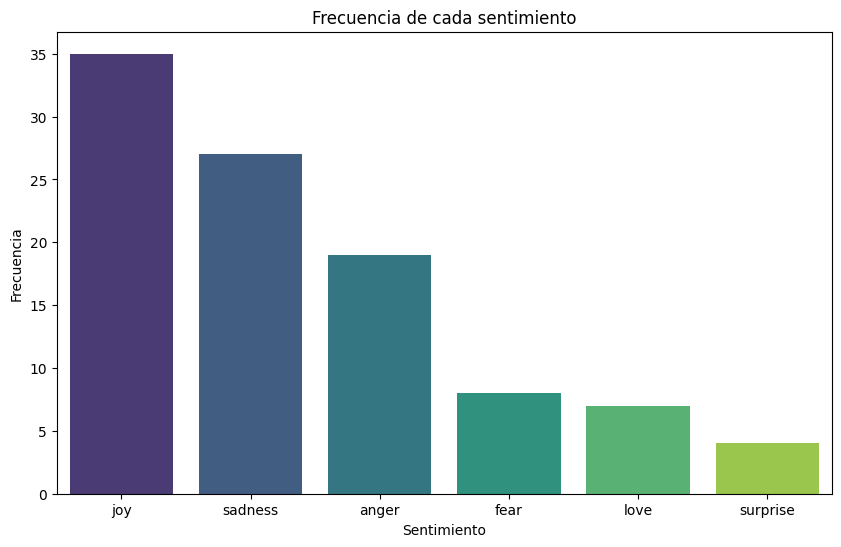

In [ ]:
# Calcular la frecuencia de cada elemento en la serie
frecuencias = df['label'].map(dic_labels).value_counts().reset_index()
frecuencias.columns = ['Label', 'Frecuencia']

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
axs=sns.barplot(x='Label', y='Frecuencia', data=frecuencias, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Frecuencia de cada sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
# Mostrar el gráfico
plt.show()

In [ ]:
#Lineas sin texto
df[df['text'].apply(lambda x: len(x))<=0]

,text,label


In [ ]:
#Explorar tweets duplicados
df[df.duplicated(subset='text')]

,text,label


## **2. Limpieza de los Datos**
---

La elección de las técnicas de preprocesamiento puede diferir en cada conjunto de datos. Recuerde que es posible aplicar, según sea necesario (no necesariamente todas), las técnicas generales que se han explorado en el curso. La elección dependerá del tipo de datos con el que esté trabajando, ya sea imágenes, datos estructurados, textos, entre otros.

- ¿Cuáles fueron los criterios utilizados para identificar y tratar valores atípicos, datos faltantes o cualquier otra anomalía en el conjunto de datos durante el proceso de limpieza?

  **Para la limpieza de datos se implementa se implementa principalmente la libreria NLKT, con la cual se realiza el tokenizado de las cadenas de texto, para luego comparar cada uno de los tokens contra listas de palabras a exluir como las stop words. Del mismo modo se implementa el metodo isalnum() para identificar aquellos tokens que contienen caracteres expeciales como signos de puntuación para luego excluirlos. Finalmente, cabe resaltar que se transforman todos los caracteres a minúsculas para evitar diferencias por capitalización.**
- ¿Cómo se justificaría la necesidad de cada paso de preprocesamiento en términos de mejora de la calidad de los datos y preparación para el análisis subsiguiente?

  **La exlusión de tokens con falta de valor semantico permite que los algoritmmos de procesamiento de lenguaje natural (NLP), que en este caso será una red neuronal, tengan un mejor resultado. Del mismo modo es requerido transformar las cadenas de texto a tokens para que la red neuronal pueda interpretar la información a analizar.**

In [ ]:
def transformar_tweets(df, columna_texto):
    """
    Genera el conteo de frecuencias de palabras de un DataFrame con una columna de texto.

    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene los textos.
    columna_texto (str): Nombre de la columna que contiene los textos.

    Retorna:
    tokens_limpios: Lista de palabras extraidas de la serie de texto que tengan un significado semantico.
    """
    # Lista de textos de ejemplo
    textos = df[columna_texto]

    # Concatenar todos los textos en uno solo
    texto_concatenado = " ".join(textos)

    # Tokenización
    tokens = word_tokenize(texto_concatenado.lower())

    # Eliminación de puntuación
    tokens = [word for word in tokens if word.isalnum()]

    # Eliminación de stopwords
    stop_words = set(stopwords.words('english'))
    tokens_limpios = [word for word in tokens if word not in stop_words]

    return tokens_limpios

In [ ]:
#Transformar datos
tweets_limpios=transformar_tweets(df,'text')
print(tweets_limpios)

['didnt', 'feel', 'humiliated', 'go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake', 'im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong', 'ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property', 'feeling', 'grouchy', 'ive', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure', 'ive', 'taking', 'milligrams', 'times', 'recommended', 'amount', 'ive', 'fallen', 'asleep', 'lot', 'faster', 'also', 'feel', 'like', 'funny', 'feel', 'confused', 'life', 'teenager', 'jaded', 'year', 'old', 'man', 'petronas', 'years', 'feel', 'petronas', 'performed', 'well', 'made', 'huge', 'profit', 'feel', 'romantic', 'feel', 'like', 'make', 'suffering', 'seeing', 'mean', 'something', 'feel', 'running', 'divine', 'experience', 'expect', 'type', 'spiritual', 'encounter', 'think', 'easiest', 'time', 'year', 'feel', 'dissatisfied', 'feel', 'low', 'energy', 'thirsty', 'immense', 'sympathy', 'general', 'point', 'possible', 'proto', 'writer', 'trying

## **Créditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*